# Hierarchical Clustering

## 1. Importing the libraries

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

## 2. Importing the dataset

In [41]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3,4]].values

## 3. Compute linkage matrix using 'ward' method

In [42]:
link_matrix = linkage(x, method='ward')

## 4. Compute the cophenetic correlation

In [43]:
c, _ = cophenet(link_matrix, pdist(x))
print(f'Cophenetic Distance: {c:.2f}')

Cophenetic Distance: 0.72


## 5. Use the dendrogram to find the optimal number of clusters

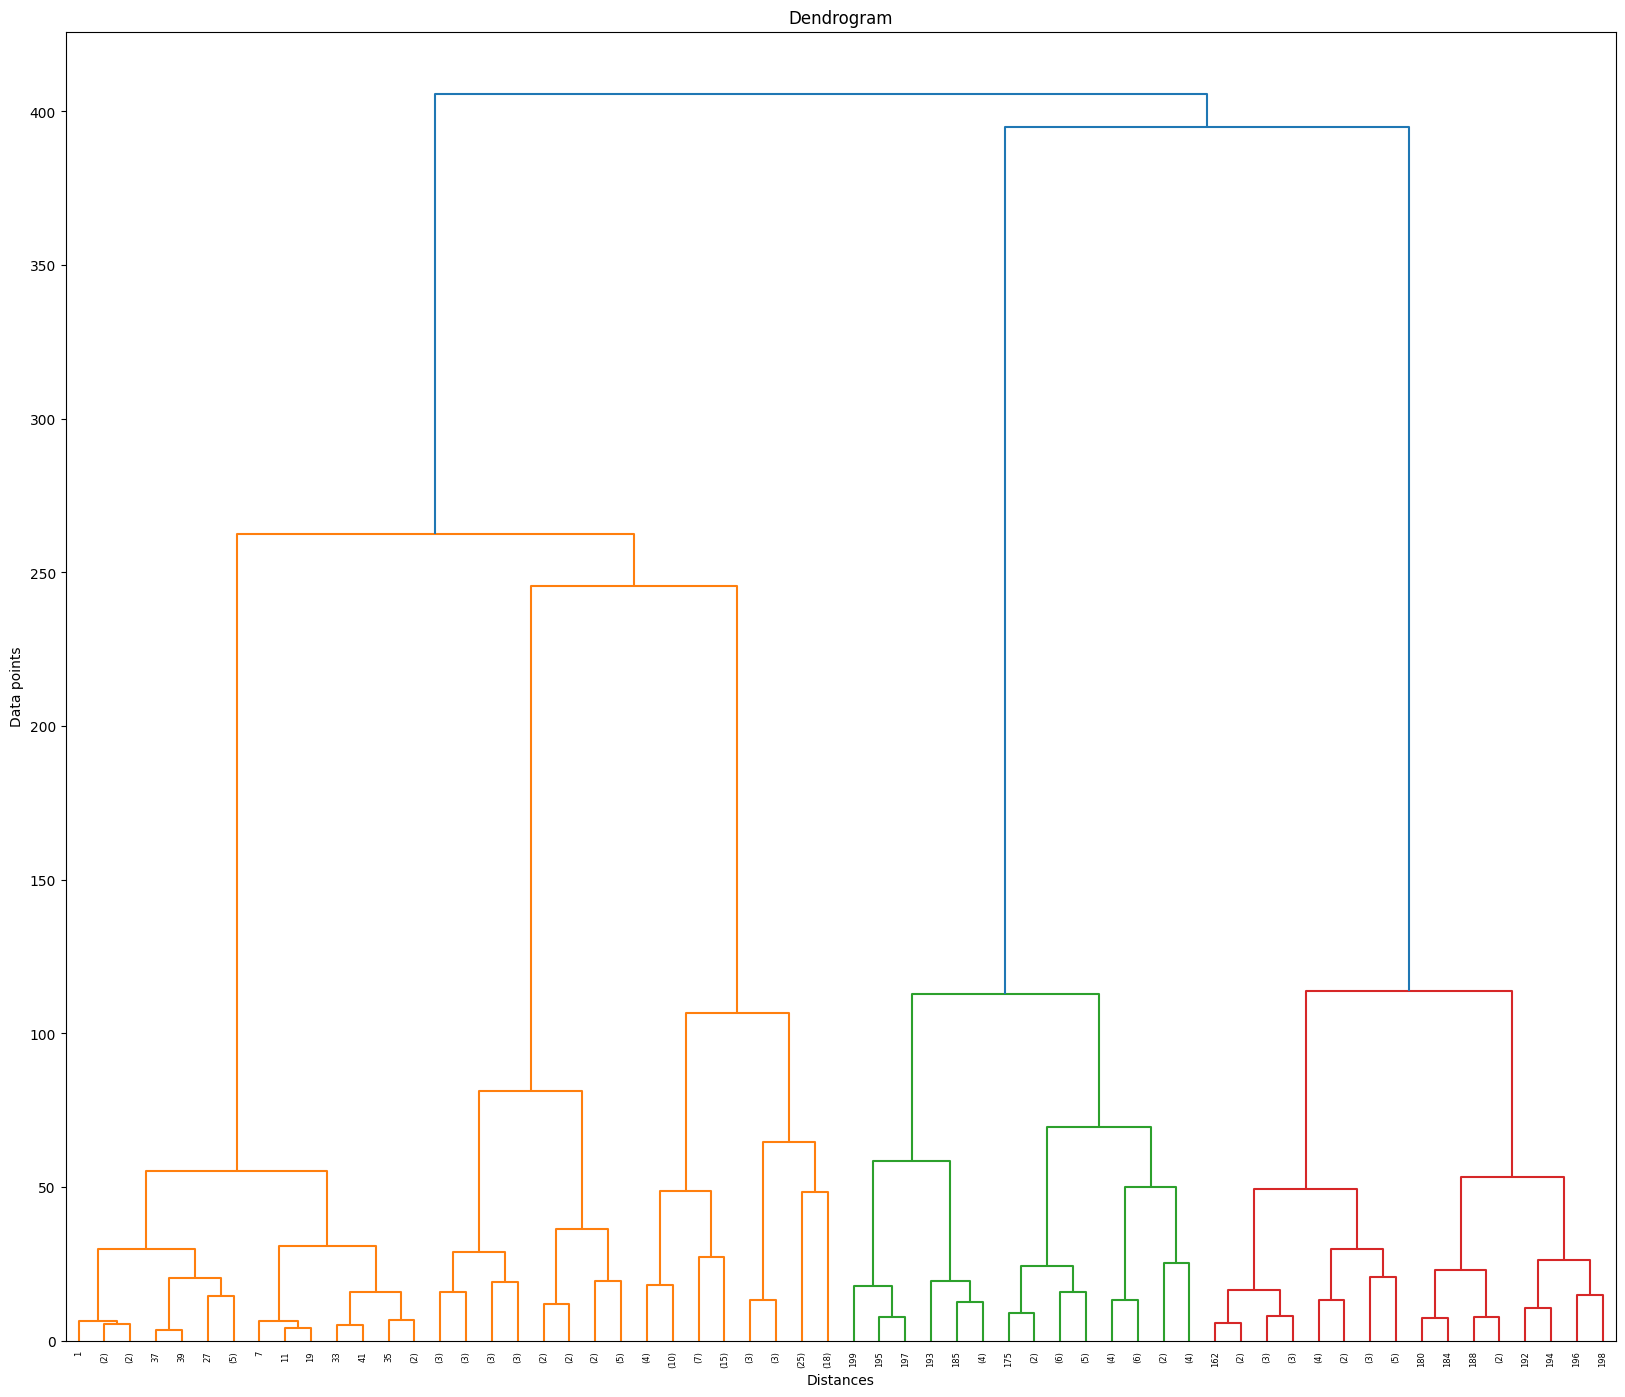

In [45]:
plt.figure(figsize=(20, 17))
dendrogram(link_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Distances')
plt.ylabel('Data points')
plt.show()

## 6. Training the hierarchical clustering model on the dataset

In [46]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
optimal_point = 5
kms = KMeans(n_clusters=optimal_point, init='k-means++', random_state=42)
y_means = kms.fit_predict(x)

/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 7. Visualizing the clusters

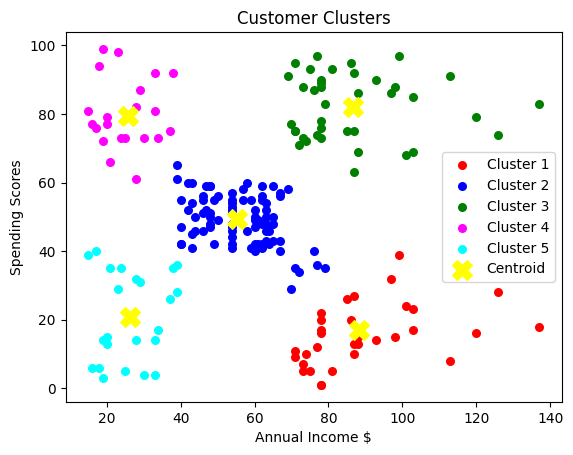

In [47]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=30, c='green', label='Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=30, c='magenta', label='Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=30, c='cyan', label='Cluster 5')
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], s=200, c='yellow', label='Centroid', marker='X')
plt.title('Customer Clusters')
plt.xlabel('Annual Income $')
plt.ylabel('Spending Scores')
plt.legend()
plt.show()